In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/titanic (1).csv')

In [ ]:
data.shape

(891, 12)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Handling missing values


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# As we can see there are 3 columns that have null values.
# So, first we will drop cabin column as it's most of the entries are missing

data.drop('Cabin',axis=1,inplace=True)

In [ ]:
data['Age'].fillna(data['Age'].mean())  # Replacing missing values with mean value

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [ ]:
data.dropna(inplace=True,axis=0) #Dropping remaining rows that have null values

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data.shape

(712, 11)

# Exploring the data

In [ ]:
obj_col=data.select_dtypes(include='object')
obj_col.head()

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


In [ ]:
data['Embarked'].nunique()

3

In [ ]:
data['Ticket'].nunique()

541

In [ ]:
data.drop(['Name','Ticket'],inplace=True,axis=1)

In [ ]:
data=pd.get_dummies(data,dtype=int)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   Sex_female   712 non-null    int64  
 8   Sex_male     712 non-null    int64  
 9   Embarked_C   712 non-null    int64  
 10  Embarked_Q   712 non-null    int64  
 11  Embarked_S   712 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 72.3 KB


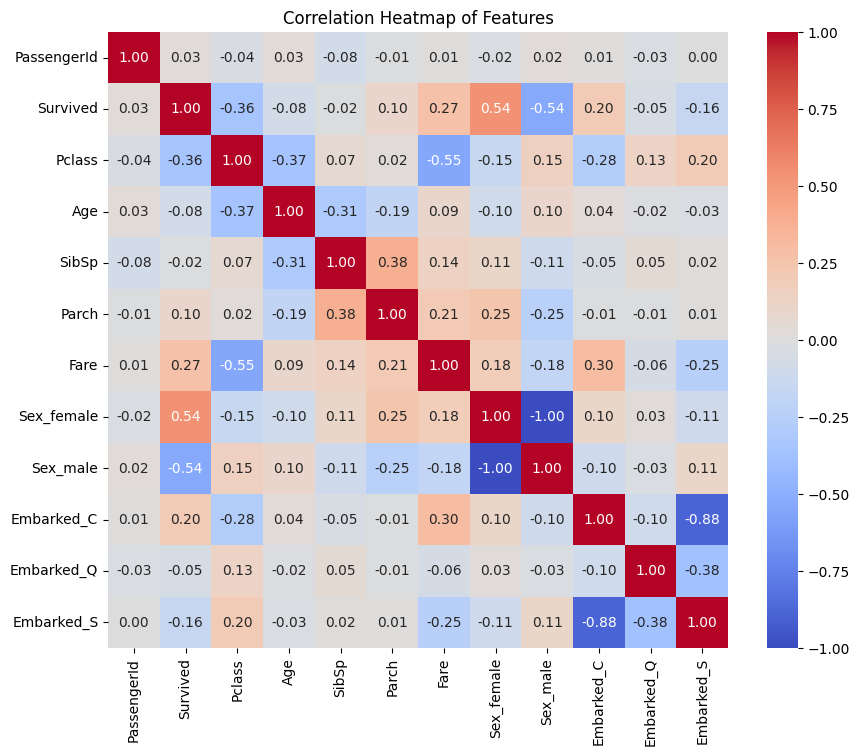

In [ ]:

correlation_matrix = data.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

The heatmap highlight the following things:
1. The survival rate of female is very high as compared to male
2. The negative correlation  indicates that passengers in lower classes (Pclass 3) had a lower survival rate compared to those in higher classes (Pclass 1).
3.There is a strong negative correlation between 'Pclass' and 'Fare', which makes sense as lower class tickets are generally cheaper.

In [ ]:
data.drop('PassengerId',axis=1,inplace=True) #Passenger Id has no significant relation with survival

# Training the Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X=data.drop('Survived',axis=1)
y=data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#Using randomsearch grid to find best parameters
n_estimators = [200,500,800,1000,1200,1300,2000]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(
    estimator=rf_clf,
    scoring='f1',
    param_distributions=random_grid,
    n_iter=100,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True})


RandomForestClassifier(max_depth=70, min_samples_leaf=4, n_estimators=2000)

In [ ]:
result=pd.DataFrame(rf_cv.cv_results_)
result.sort_values(by='mean_test_score',ascending=False,inplace=True)
result[['param_n_estimators','params','mean_test_score']].head(10)

,param_n_estimators,params,mean_test_score
79,2000,"{'n_estimators': 2000, 'min_samples_split': 2,...",0.746607
2,1000,"{'n_estimators': 1000, 'min_samples_split': 2,...",0.746363
29,500,"{'n_estimators': 500, 'min_samples_split': 5, ...",0.746363
7,500,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.746363
76,1200,"{'n_estimators': 1200, 'min_samples_split': 2,...",0.746363
73,1000,"{'n_estimators': 1000, 'min_samples_split': 2,...",0.746363
39,800,"{'n_estimators': 800, 'min_samples_split': 2, ...",0.746363
71,500,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.745811
24,500,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.745811
35,200,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.745614


In [ ]:
# Initialising the model
model=RandomForestClassifier(n_estimators=2000,random_state=42,min_samples_split= 2, min_samples_leaf= 4, max_features= 'sqrt', max_depth=70, bootstrap=True)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)



# Model Evaluation

In [ ]:

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)()}\n")

In [ ]:
# Training Result
print_score(model,X_train,y_train,X_test,y_test,train=True)



Train Result:
Accuracy Score: 88.75%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.870370    0.921466  0.887522    0.895918      0.890575
recall       0.956395    0.782222  0.887522    0.869309      0.887522
f1-score     0.911357    0.846154  0.887522    0.878756      0.885574
support    344.000000  225.000000  0.887522  569.000000    569.000000
_______________________________________________
Confusion Matrix: 
 [[329  15]
 [ 49 176]]



In [ ]:
#Testing Result
print_score(model,X_train,y_train,X_test,y_test,train=False)

Test Result:
Accuracy Score: 79.02%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.760417   0.851064   0.79021    0.805740      0.800352
recall      0.912500   0.634921   0.79021    0.773710      0.790210
f1-score    0.829545   0.727273   0.79021    0.778409      0.784488
support    80.000000  63.000000   0.79021  143.000000    143.000000
_______________________________________________
Confusion Matrix: 
 [[73  7]
 [23 40]]



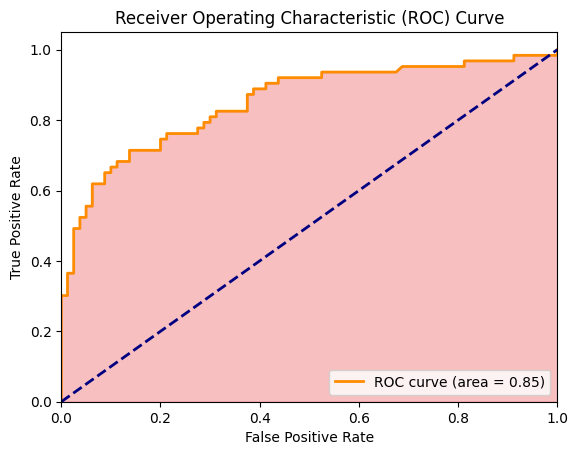

In [ ]:
#Plottint roc-auc curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='lightcoral', alpha=0.5)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')# This model predict the survival of passenger with roc=0.85, far better than thr random guess(roc=0.5)
plt.ylabel('True Positive Rate')# This model predict the survival of passenger with roc=0.85, far better than thr random guess(roc=0.5)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


This model predict the survival of passenger with roc=0.85, far better than thr random guess(roc=0.5)